In [1]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/giulio/PhD/projects/complex-networks/LRG-Signed


In [ ]:
z = 4
#
pow2_m, pow2_M = 6, 14
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]
#
lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([2**(15-i) for i in asize_range])
lsp = np.round([0.001, 0.01, 0.025, 0.05, 0.075, 0.085, 0.095, 
       0.098, 0.100, 0.102, 0.104, 0.106, 0.11, 
       0.2, 0.3, 0.4, 0.5], 3)
dctNp = {N: np.array([z * N**2 * p // 2 for p in lsp]).astype('int')
       for N in lsN}

In [ ]:
dctNp

In [ ]:
sqLattice = Lattice2D(#
    side1 = 64,
    geometry = 'squared'
)


In [ ]:
plt.figure(figsize=(12, 8))
for replica in range(10):
    SLRG_obj = SignedLaplacianAnalysis(#
        system = sqLattice,
        pflip = 0.01,
        t2 = 3.5
    )
    SLRG_obj.flip_random_fract_edges()
    SLRG_obj.compute_entropy()
    t = SLRG_obj.timescale_for_C()
    plt.plot(t, SLRG_obj.Cspe)
    # plt.axvline(t[np.argmax(SLRG_obj.Cspe)])
plt.xscale('log')

In [ ]:
G = SLRG_obj.system.G
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(8, 8))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=100, width=2.5)

plottati anche la distribuzione dei massimi

In [ ]:
from scipy.ndimage import median_filter
random.seed(453498)
replicas = 200

a = np.zeros(steps-1)
plt.figure(figsize=(12, 8))
for replica in range(replicas):
    t = SLRG_obj.timescale_for_C()
    while True:
        SLRG_obj = SignedLaplacianAnalysis(#
            system = sqLattice,
            pflip = 0.98,
            t2 = 4,
            steps=steps
        )
        SLRG_obj.flip_random_fract_edges()
        SLRG_obj.compute_entropy()
        # plt.plot(t, median_filter(SLRG_obj.Cspe, size=2))
        index = np.where(np.diff(SLRG_obj.Cspe) > SPIKE_THRESHOLD)
        if not index[0].size:
            break
    plt.plot(t, SLRG_obj.Cspe)
    a += SLRG_obj.Cspe 
    # plt.axvline(t[np.argmax(SLRG_obj.Cspe)])
plt.plot(t, a/(replicas), 'k', lw=2)
plt.xscale('log')

In [ ]:
1000*100

In [ ]:
G = SLRG_obj.system.G
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(8, 8))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=100, width=2.5)

In [ ]:
z = 4
pow2_m, pow2_M = 6, 14
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]

lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([2**(16-i) for i in asize_range])
lsp = [0.001, 0.01, 0.025, 0.05, 0.075, 0.085, 0.095, 
       0.098, 0.100, 0.102, 0.104, 0.106, 0.11, 
       0.2, 0.3, 0.4, 0.5]
dctNp = {N: np.array([z * N**2 * p // 2 for p in lsp]).astype('int')
       for N in lsN}


In [ ]:
G = nx.grid_2d_graph(10, 10, periodic=True)

In [ ]:
G

In [ ]:
G = nx.MultiDiGraph()
G.add_edge(0, 1, weight=2)

G.add_edge(1, 0)

G.add_edge(2, 2, weight=3)

G.add_edge(2, 2)
S = nx.to_scipy_sparse_array(G, nodelist=[0, 1, 2])


In [ ]:
G = nx.grid_2d_graph(10, 15, periodic=True)
A = nx.to_scipy_sparse_array(G, format="csr")
D = scsp.csr_array(scsp.spdiags(np.abs(A).sum(axis=1), 0, *A.shape, format="csr"))

In [ ]:
def bar():
    foo()
bar()
def foo():
    print("Hi!")


In [ ]:
eigvals(D.toarray())

In [ ]:
class prova:
    def __init__(self, a) -> None:
        self.a = self.define_quantity(a)
        pass
    def define_quantity(self, x):
        return x+ 200

In [ ]:
b = prova(a=10)

In [ ]:
b.a

In [ ]:
G = nx.hexagonal_lattice_graph(10, 10, periodic=True)


In [ ]:
G.number_of_edges()

In [ ]:
120/17

In [ ]:
numdig = '.3g'
print(f"{100.1928763:{numdig}}")

In [21]:
#
STEPS = 1500
SPIKE_THRESHOLD = 0.1
#
pow2_m, pow2_M, pow2_A = 6, 8, 15
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]
#
lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([2**(pow2_A-i) for i in asize_range])
lsp = np.round([0.001, 0.01, 0.025, 0.05, 0.075, 0.085, 0.095, 
       0.098, 0.100, 0.102, 0.104, 0.106, 0.11, 
       0.2, 0.3, 0.4, 0.5], 3)
#
for iL, iN, iA in zip(lsL, lsN, lsA):
    #
    path = f"{datPath_l2d_sq}N={iN}_navg={iA}/"
    if not os.path.isdir(path):
        os.makedirs(path)
    #
    sqLattice = Lattice2D(#
        side1 = iL,
        geometry = 'squared'
    )
    for pflip in lsp:
        savename = lambda idstr : f"{path}p={pflip:{pflip_fmt}}_{idstr}{eBIN}"
        if os.path.exists(savename('Sm1')):
            print(savename('Sm1'))
            continue
        Sm1File = open(savename('Sm1'), "wb")
        CspeFile = open(savename('Cspe'), "wb")
        slspecFile = open(savename('slspec'), "wb")
        #
        for nr in tqdm(range(iA), desc=f"replicas for L={iL}, p={pflip}"):
            while True:
                SLRG_obj = SignedLaplacianAnalysis(#
                    system = sqLattice,
                    pflip = pflip,
                    t2 = 4,
                    steps = STEPS
                )
                SLRG_obj.flip_random_fract_edges()
                SLRG_obj.compute_entropy()
                index = np.where(np.diff(SLRG_obj.Cspe) > SPIKE_THRESHOLD)
                if not index[0].size:
                    break
            #
            Sm1BytesArray = bytes(SLRG_obj.Sm1)
            CspeBytesArray = bytes(SLRG_obj.Cspe)
            slspecBytesArray = bytes(SLRG_obj.slspectrum)
            #
            Sm1File.write(Sm1BytesArray)
            CspeFile.write(CspeBytesArray)
            slspecFile.write(slspecBytesArray)
        Sm1File.close()
        CspeFile.close()
        slspecFile.close()

data/l2d_sq/N=64_navg=512/p=0.001_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.01_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.025_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.05_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.075_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.085_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.095_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.098_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.1_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.102_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.104_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.106_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.11_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.2_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.3_Sm1.bin
data/l2d_sq/N=64_navg=512/p=0.4_Sm1.bin


replicas for L=8, p=0.5: 100%|██████████| 512/512 [00:26<00:00, 19.35it/s]


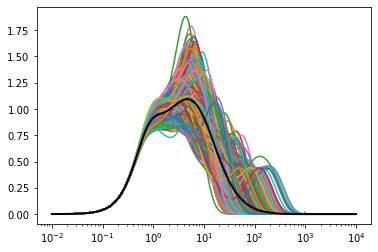

In [24]:
bb = np.fromfile("data/l2d_sq/N=64_navg=512/p=0.5_Cspe.bin").reshape(512, 1499)
for i in bb:
    plt.plot(np.logspace(-2, 4, 1499),i)
plt.plot(np.logspace(-2, 4, 1499),np.mean(bb, axis=0), 'k', lw=2)
plt.xscale('log')